# User guide

## Generate and access turbulence field

In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from hipersim import MannTurbulenceField
import multiprocessing
import importlib

Turbulence fields are generated using the MannTurbulenceField.generate method:

In [2]:
help(MannTurbulenceField.generate)

Help on function generate in module hipersim._hipersim:

generate(alphaepsilon=1, L=33.6, Gamma=3.9, Nxyz=(8192, 64, 64), dxyz=(1, 1, 1), seed=1, HighFreqComp=0, double_xyz=(False, True, True), n_cpu=1, verbose=0, random_generator=None, cache_spectral_tensor=False)
    Generate a MannTurbulenceField
    
    Parameters
    ----------
    alphaepsilon : float, optional
        Mann model turbulence parameter $(\alpha \varepsilon)^{2/3}$ (Mann, 1994), default is 1.
    L : float, optional
        Mann model turbulence length scale parameter $L$ (Mann, 1994), default is 33.6
    Gamma : float, optional
        Mann model turbulence anisotropy parameter $\Gamma$ (Mann, 1994), default is 3.9
    Nxyz: (int,int,int)
        Dimension of the turbulence box in x (longitudinal), y (transveral) and z (vertical) direction.
        Default is (8192,64,64)
    dxyz : (float, float, float), optional
        Spacing in meters between data points along the x,y,z coordinates. Default is (1,1,1)
    see

In [3]:
mtf = MannTurbulenceField.generate(alphaepsilon=.1,
                                   L=33.6,
                                   Gamma=3.9,
                                   Nxyz=(1024,64,64), 
                                   dxyz=(4,2,2), 
                                   seed=1, 
                                   HighFreqComp=0, 
                                   double_xyz=(False, True, True))

The raw turbulence data is stored in the `uvw` variable

In [4]:
u,v,w = mtf.uvw
u.shape

(1024, 64, 64)

The `to_xarray` method exports an xarray dataarray with the turbulence data and all attributes

In [5]:
da = mtf.to_xarray() # xarray dataarray
da

<xarray.DataArray (uvw: 3, x: 1024, y: 64, z: 64)> Size: 50MB
array([[[[-1.06722391e+00, -9.11766350e-01, -1.09172642e+00, ...,
           1.45228708e+00,  1.39533019e+00,  1.53455162e+00],
         [-9.47559476e-01, -6.49923682e-01, -9.84678030e-01, ...,
           1.44495678e+00,  1.25722265e+00,  1.48809803e+00],
         [-1.18221796e+00, -7.66179323e-01, -1.18622351e+00, ...,
           1.15684581e+00,  1.43644488e+00,  1.12957585e+00],
         ...,
         [ 1.37539446e+00,  1.44499826e+00,  1.36412323e+00, ...,
           1.71722853e+00,  1.24690521e+00,  6.60602987e-01],
         [ 1.36570394e+00,  1.47212410e+00,  1.27690542e+00, ...,
           1.60486281e+00,  1.37281942e+00,  1.16389358e+00],
         [ 1.19318187e+00,  1.18873072e+00,  1.42475224e+00, ...,
           2.07942677e+00,  1.92836571e+00,  1.34069228e+00]],

        [[-8.27491939e-01, -7.72828639e-01, -1.01054978e+00, ...,
           2.01455545e+00,  1.88230836e+00,  2.06121898e+00],
         [-1.40368748e+00, -1.15813982e+00, -1.04139829e+00, ...,
           2.05697250e+00,  2.31357455e+00,  2.17605233e+00],
         [-1.13080359e+00, -6.60503864e-01, -8.17114472e-01, ...,
           1.52948534e+00,  1.34062982e+00,  1.04008341e+00],
...
          -1.17631316e+00, -1.34029853e+00, -1.63597703e+00],
         [ 8.88433233e-02,  1.40094057e-01, -6.92046806e-03, ...,
          -9.75362539e-01, -1.41609395e+00, -1.98467863e+00],
         [-3.63194138e-01, -1.65986419e-01,  8.71252567e-02, ...,
          -9.36011136e-01, -9.41912413e-01, -1.21727693e+00]],

        [[ 1.03636050e+00,  1.30921483e+00,  1.74372816e+00, ...,
          -9.00405526e-01, -9.26196635e-01, -8.01780283e-01],
         [ 1.12547183e+00,  1.30546427e+00,  1.49324310e+00, ...,
          -1.12577999e+00, -1.17425358e+00, -8.98413181e-01],
         [ 1.19445455e+00,  1.50068903e+00,  1.64676011e+00, ...,
          -1.34154344e+00, -1.22823966e+00, -1.16993845e+00],
         ...,
         [ 7.20019490e-02,  8.58015120e-02, -1.63560644e-01, ...,
          -1.47009027e+00, -1.67855024e+00, -1.31417513e+00],
         [-6.60947442e-01, -5.48535287e-01, -3.43858898e-01, ...,
          -1.26657009e+00, -9.75701094e-01, -1.09911346e+00],
         [-9.10558581e-01, -8.29948843e-01, -5.32981575e-01, ...,
          -1.25635195e+00, -1.13243425e+00, -7.64118254e-01]]]],
      dtype=float32)
Coordinates:
  * x        (x) int32 4kB 0 4 8 12 16 20 24 ... 4072 4076 4080 4084 4088 4092
  * y        (y) int32 256B 0 2 4 6 8 10 12 14 ... 114 116 118 120 122 124 126
  * z        (z) int32 256B 0 2 4 6 8 10 12 14 ... 114 116 118 120 122 124 126
  * uvw      (uvw) <U1 12B 'u' 'v' 'w'
Attributes:
    alphaepsilon:  0.1
    L:             33.6
    Gamma:         3.9
    HighFreqComp:  0
    Generator:     Hipersim
    seed:          1
    double_xyz:    [0 1 1]
    name:          Hipersim_mann_l33.6_ae0.1000_g3.9_h0_1024xd64xd64_4.000x2....

From the dataarray you can easily plot the turbulence witht the correct scaled axes

(-2.0, 4094.0, -1.0, 127.0)

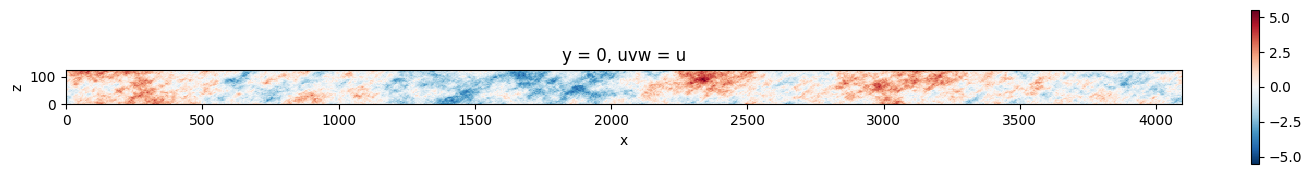

In [6]:
plt.figure(figsize=(18,2))
da.sel(uvw='u',y=0).plot(x='x')
plt.axis('scaled')

## Save turbulence box

In [7]:
# make tmp folder
os.makedirs('tmp', exist_ok=True)

### Netcdf
The turbulence box can be saved as netcdf (one file including all attributes) 

In [8]:
mtf.to_netcdf(folder='tmp', filename=None)

If `filename=None` (default), the name is autogenerated from the properties:

In [9]:
mtf.name

'Hipersim_mann_l33.6_ae0.1000_g3.9_h0_1024xd64xd64_4.000x2.00x2.00_s0001'

### HAWC2
The turbulence box can be saved as hawc2 (three binary files) by

In [10]:
mtf.to_hawc2(folder='tmp', basename=None)

In [11]:
os.listdir('tmp')

['Hipersim_mann_l33.6_ae0.1000_g3.9_h0_1024xd64xd64_4.000x2.00x2.00_s0001.nc',
 'Hipersim_mann_l33.6_ae0.1000_g3.9_h0_1024xd64xd64_4.000x2.00x2.00_s0001u.turb',
 'Hipersim_mann_l33.6_ae0.1000_g3.9_h0_1024xd64xd64_4.000x2.00x2.00_s0001v.turb',
 'Hipersim_mann_l33.6_ae0.1000_g3.9_h0_1024xd64xd64_4.000x2.00x2.00_s0001w.turb']

## Interpolation

The `MannTurbulenceField` has a buildin linear interpolation function that handles out-of-box interpolation depending on whether the axes have been doubled.
For axes which have been doubled (default for y and z), the box is mirrored, while axes that have not been doubled (default for x), the box is repeated.

In [12]:
ip_x, ip_z = np.meshgrid(np.linspace(-1000,5000,2000), np.linspace(-100,400,200))
ip_y = ip_x*0

In [13]:
u = mtf(ip_x, ip_y, ip_z)[...,0]

(-1000.0, 5000.0, -100.0, 400.0)

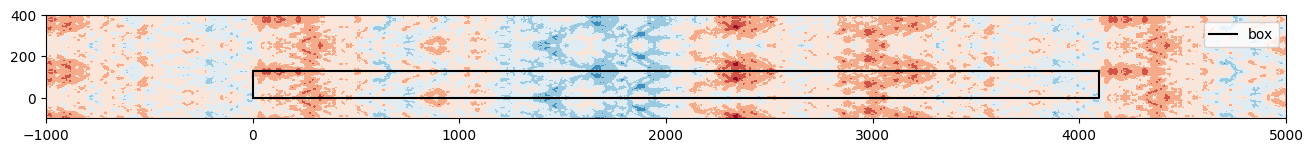

In [14]:
plt.figure(figsize=(16,2))
plt.contourf(ip_x,ip_z,u.reshape(ip_x.shape), cmap='RdBu_r')
x1,y1 = mtf.Nx*mtf.dx, mtf.Nz*mtf.dz
plt.plot([0,x1, x1, 0,0],[0,0, y1,y1,0],'k', label='box')
plt.legend()
plt.axis('scaled')

The raw turbulence box is marked with the black rectangle. The remaining turbulence is mirrored (vertical direction) or repeated (longitudinal direction)

## Multiple turbulence boxes (reuse spectral tensor)
In case, you need to generate multiple turbulence boxes where **only** the `seed` and `alphaepsilon` varies, the computational time can be reduced by reusing the spectral tensor.
The eaiest way to do this is set the argument `cache_spectral_tensor=True` 

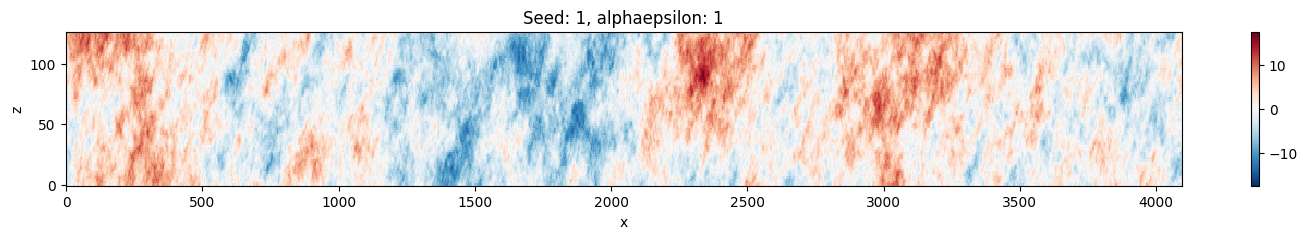

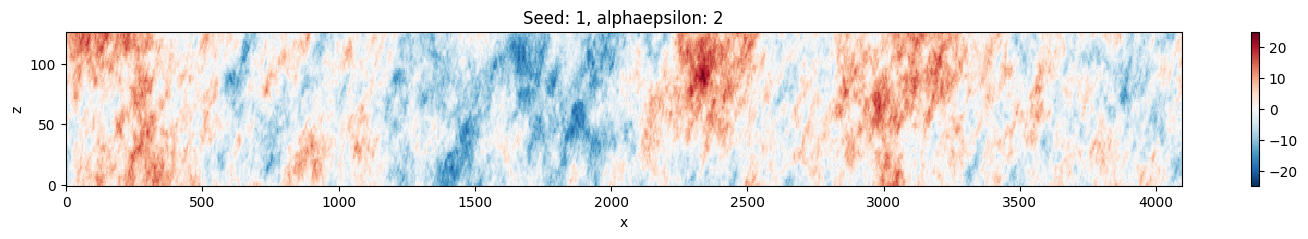

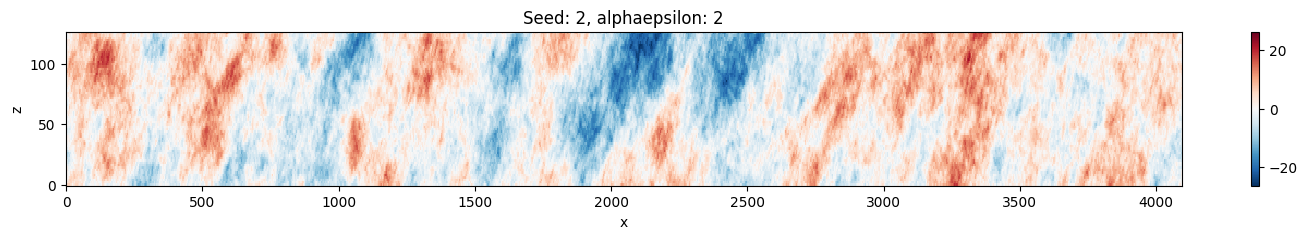

In [15]:
for seed, alphaepsilon in [(1,1), (1, 2), (2, 2)]:
    mtf = MannTurbulenceField.generate(alphaepsilon=alphaepsilon,
                                       L=33.6,
                                       Gamma=3.9,
                                       Nxyz=(1024,64,64), 
                                       dxyz=(4,2,2), 
                                       seed=seed, 
                                       HighFreqComp=0, 
                                       double_xyz=(False, True, True),
                                       cache_spectral_tensor=True) # reuse spectal tensor
    plt.figure(figsize=(18,2))
    mtf.to_xarray().sel(uvw='u',y=0).plot(x='x')
    plt.title(f'Seed: {seed}, alphaepsilon: {alphaepsilon}')

In this case the cached spectral tensor is stored in the file `mannsqrtphi_l33.6_g3.9_h0_1024xd64xd64_4.000x2.00x2.00.npy`.
Note, remember to delete the cached spectral tensor files after use as they can be quite big, in this case around 300MB

In [16]:
!ls mannsqrtphi_l33.6_g3.9_h0_1024xd64xd64_4.000x2.00x2.00.npy


(.py311_dynamiks_jupyter7) ]9;8;"USERNAME"\@]9;8;"COMPUTERNAME"\ c:\mmpe\programming\python\Topfarm\hipersim\doc
$ ]9;12\dir mannsqrtphi_l33.6_g3.9_h0_1024xd64xd64_4.000x2.00x2.00.npy 
 Volume in drive C is Windows
 Volume Serial Number is 4637-B881

 Directory of c:\mmpe\programming\python\Topfarm\hipersim\doc

28-10-2024  14:51       302.579.840 mannsqrtphi_l33.6_g3.9_h0_1024xd64xd64_4.000x2.00x2.00.npy
               1 File(s)    302.579.840 bytes
               0 Dir(s)  677.719.523.328 bytes free


## Spectra

The spectra of the turbulence realization can be obtained by the `spectra` method

In [17]:
k_rea, spectra_rea = mtf.spectra()

Furthermore, the theoretical spectra of the spectral tensor can be found by integration

In [18]:
k_int, spectra_int = mtf.spectra_integrated()

or from a build-in look-up table

In [19]:
k_lut, spectra_lut = mtf.spectra_lookup()

In [20]:
c_lst = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
s_lst = ["uu","vv","ww","uw"]

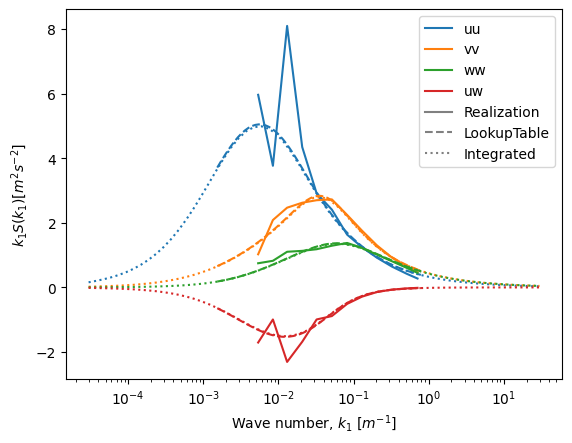

In [21]:
for phi_rea, phi_int, phi_lut, c, l in zip(spectra_rea, spectra_int, spectra_lut, c_lst, s_lst):
    plt.semilogx(k_rea, phi_rea*k_rea, color=c, label=l)
    plt.semilogx(k_int, phi_int*k_int, '--', color=c)
    plt.semilogx(k_lut, phi_lut*k_lut, ':', color=c)
    
plt.plot([], '-', color='gray', label='Realization')
plt.plot([], '--', color='gray', label='LookupTable')
plt.plot([], ':', color='gray', label='Integrated')
plt.xlabel('Wave number, $k_1$ $  [m^{-1}$]')
plt.ylabel('$k_1 S(k_1)[m^2s^{-2}]$')
plt.legend()
    

## Coherence
The coherence of the turbulence in two points separated by `(dy, dz)`, can be obtained by the `coherence` method

Furthermore, the theoretical coherence of the spectral tensor can be found by integration

In [22]:
dy = 2*mtf.dy # 4m
dz = 3*mtf.dz # 6m

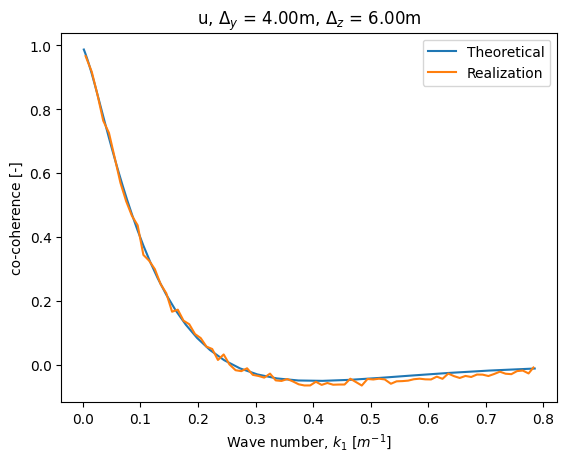

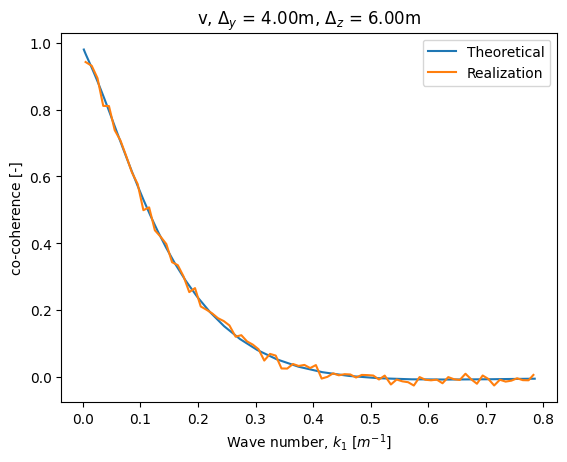

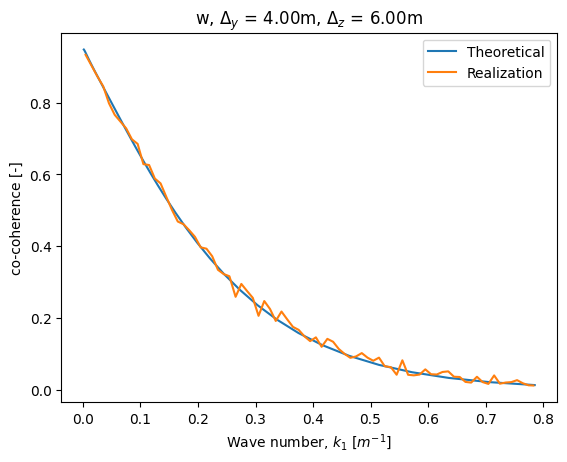

In [23]:
for comp in ['u','v','w']:
    k_int, coherence_int = mtf.coherence_integrated(dy,dz, component=comp)
    k_rea, coherence_rea = mtf.coherence(dy,dz, component=comp)
    plt.figure()
    s = r'$\Delta_y$ = %.2fm, $\Delta_z$ = %.2fm' % (dy, dz)
    plt.title(f'{comp}, {s}')
    plt.plot(k_int, coherence_int, label='Theoretical')
    plt.plot(k_rea, coherence_rea, label='Realization')
    plt.xlabel('Wave number, $k_1$ [$m^{-1}$]')
    plt.ylabel('co-coherence [-]')
    plt.legend()

## Variance

### Theoretical spectrum
The variance of the theoretical Mann model spectrum can be obtained by the `spectrum_variance` method

In [24]:
mtf.spectrum_variance()

38.559824397503185

The variance is obtained by discrete integration of the theoretical spectrum

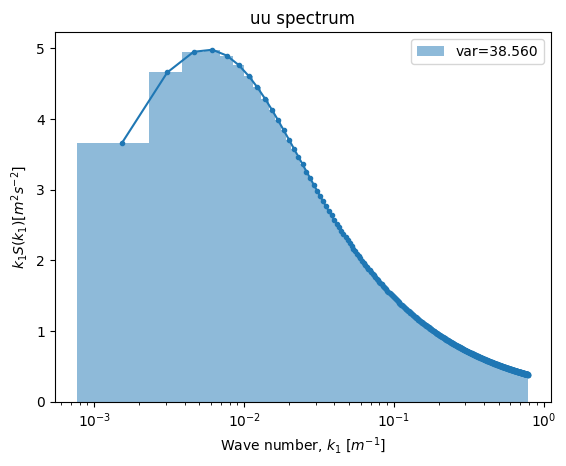

In [25]:
k = mtf.get_k()
k_lut, spectra_lut = mtf.spectra_lookup(k)

def plot_variance_integration(k,S):
    plt.semilogx(k, k*S[0],'.-')
    dk = np.diff(k[:2])
    variance = 2 * np.sum(S[0]*dk)
    plt.bar(k, S[0]*k, width=dk, alpha=.5, label=f'var={variance:.3f}')
    plt.title('uu spectrum')
    plt.xlabel('Wave number, $k_1$ $  [m^{-1}$]')
    plt.ylabel('$k_1 S(k_1)[m^2s^{-2}]$')
    plt.legend()
plot_variance_integration(k_lut,spectra_lut)

As default `get_variance` obtains the wave number limits from the length of the box, `Nx*dx` and the distance between grid points, `dx`, but other values can be specified. This is usefull if you want to compare the variance of a 1 hour box with the variance of e.g. 10min measurements.

In [26]:
mtf.spectrum_variance(Lx=1024, dx=16)

26.040102636402843

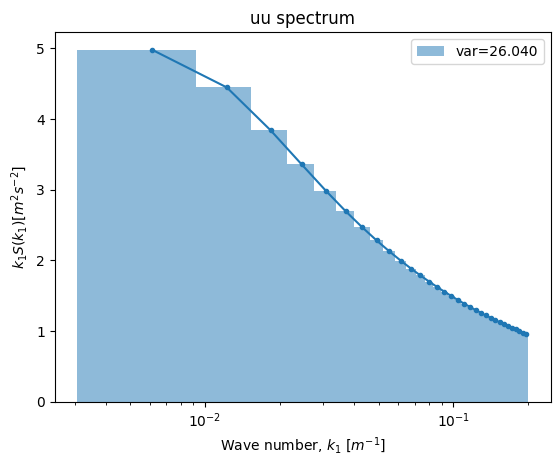

In [27]:
k = mtf.get_k(Lx=1024, dx=16)
k_lut, spectra_lut = mtf.spectra_lookup(k)
plot_variance_integration(k_lut, spectra_lut)

### Realization

The variance can be obtained from the realization as the mean of the variance of each grid point in the (y,z) plane:

In [28]:
mtf.uvw[0].var(0).mean()

38.490097

or by discrete integrating the spectrum:

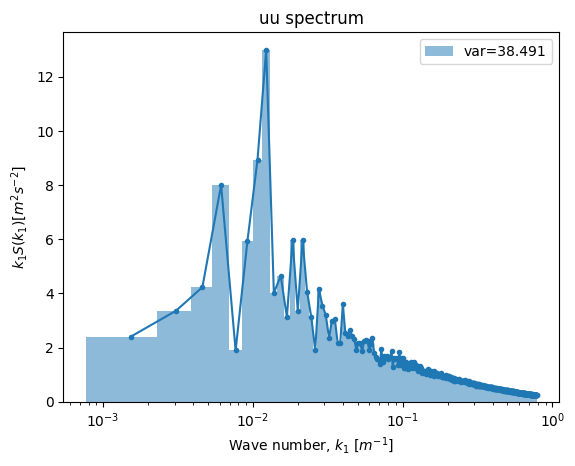

In [29]:
k_rea, spectra_rea = mtf.spectra(log10_bin_size=None) # skip binning
plot_variance_integration(k_rea, spectra_rea)

## Turbulence intensity

In [30]:
mtf_lst = [MannTurbulenceField.generate(alphaepsilon=.1,L=33.6,Gamma=3.9,
                                   Nxyz=(1024,64,64), dxyz=(4,2,2), seed=seed, 
                                   HighFreqComp=0, double_xyz=(False, True, True),
                                   cache_spectral_tensor=True) 
           for seed in [0,4,8]]
mtf = mtf_lst[0]
U = 10

### Theoretical spectrum

The turbulence intensity of the theoretical Mann model spectrum can be obtained with the `spectra_TI` method

In [31]:
mtf.spectrum_TI(U=U)

0.1388521234938508

Wave number limits can be specified via signal length, `T`, and cut-off frequency, `cutoff_frq`, associated with the TI measure. The cut-off frequency is e.g. caused by inertia in the cups of a cup anemometer and probe volume of a lidar.

In [32]:
mtf.spectrum_TI(U=U, T=600, cutoff_frq=10)

0.14324855863543767

### Realization
The turbulence intensity of a box realization can be obtained by

In [33]:
mtf_lst[0].uvw[0].std(0).mean() / U

0.1373198390007019

Realizations may, however have very different turbulence intensities due to uncertainty on the low frequencies

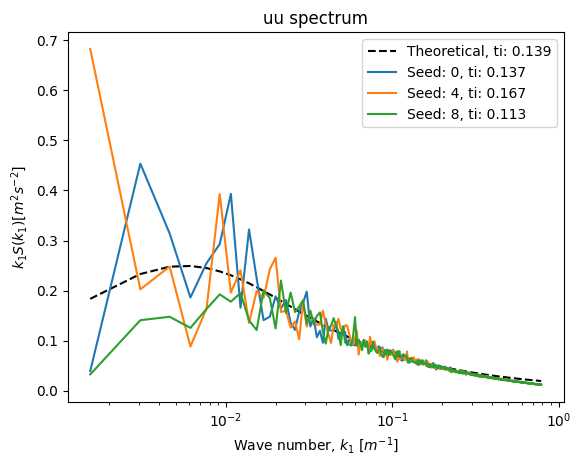

In [34]:
T = mtf.dx * mtf.Nx / U # Box length [s]
cutoff_frq = U / (2 * mtf.dx) # Nyquist frequency [Hz]

# Calculate and plot theoretical spectrum and ti
k_lut, spectra_lut = mtf.spectra_lookup(k1 = mtf.get_k())
spectra_ti = mtf.spectrum_TI(U=10)
plt.semilogx(k_lut, k_lut*spectra_lut[0], '--k', label=f'Theoretical, ti: {np.round(spectra_ti,3):0.3f}')

# Calculate and plot spectrum and ti of the four realizations
for mtf in mtf_lst:
    k_rea, spectra_rea = mtf.spectra(min_bin_count=1, log10_bin_size=None)
    plt.semilogx(k_rea, k_rea*spectra_rea[0], label=f'Seed: {mtf.seed}, ti: {np.round(np.mean(mtf.uvw[0].std(0)) / U,3):0.3f}')
    
plt.title('uu spectrum')
plt.xlabel('Wave number, $k_1$ $  [m^{-1}$]')
plt.ylabel('$k_1 S(k_1)[m^2s^{-2}]$')
plt.legend()

## Turbulence scaling

In case, a specific turbulence intensity is needed, the turbulence field can be scaled accordingly.

In [35]:
for i, mtf in enumerate(mtf_lst):
    print(f"Box {i}")
    print (f'Before: Box TI={mtf.uvw[0].std(0).mean()/U:.3f}, alphaepsilon:{mtf.alphaepsilon:.3f}, theoretical spectrum TI {mtf.spectrum_TI(U):.2f}')
    mtf.scale_TI(TI=0.1, U=10)
    print (f'After: Box TI={mtf.uvw[0].std(0).mean()/U:.3f}, alphaepsilon:{mtf.alphaepsilon:.3f}, theoretical spectrum TI {mtf.spectrum_TI(U):.2f}')
    print()    

Box 0
Before: Box TI=0.137, alphaepsilon:0.100, theoretical spectrum TI 0.14
After: Box TI=0.099, alphaepsilon:0.052, theoretical spectrum TI 0.10

Box 1
Before: Box TI=0.167, alphaepsilon:0.100, theoretical spectrum TI 0.14
After: Box TI=0.120, alphaepsilon:0.052, theoretical spectrum TI 0.10

Box 2
Before: Box TI=0.113, alphaepsilon:0.100, theoretical spectrum TI 0.14
After: Box TI=0.081, alphaepsilon:0.052, theoretical spectrum TI 0.10



## Get alpha epsilon

The $\alpha\epsilon^{2/3}$ value that corresponds to a theoretical spectrum with a specific TI can be obtained by

In [36]:
mtf.get_alpha_epsilon(TI=.1, U=U)

0.051867456121753086

It can even be calculated without generating the turbulence box:

In [37]:
from hipersim.turbgen.spectral_tensor import MannTurbulenceInput
mti = MannTurbulenceInput(alphaepsilon=1, # dummy value
                          L=33.6,Gamma=3.9,
                          Nxyz=(1024,64,64), dxyz=(4,2,2))
mti.get_alpha_epsilon(TI=.1, U=U)

0.051867456121753086

## High frequency compensation
The `HighFreqComp` argument defines whether high-frequency compensation is applied. There are three options:

- `0`  or `False` (default): No high-frequency compensation applied
- `1` or `True`: A fast high-Frequency compensation method is applied. This method differs from the method in Mann (1998)
- `2`: The high-Frequency compensation method from the C++ version is applied. The method corresponds to Eq. A.6 in Mann (1998) except that the convolution is only applied in the (k2,k3), i.e. -2<=n_l<=2, l=(2,3). Note that this method is very slow

Spectra with HighFreqComp=0 computed in 0s
Spectra with HighFreqComp=1 computed in 1s
Spectra with HighFreqComp=2 computed in 22s


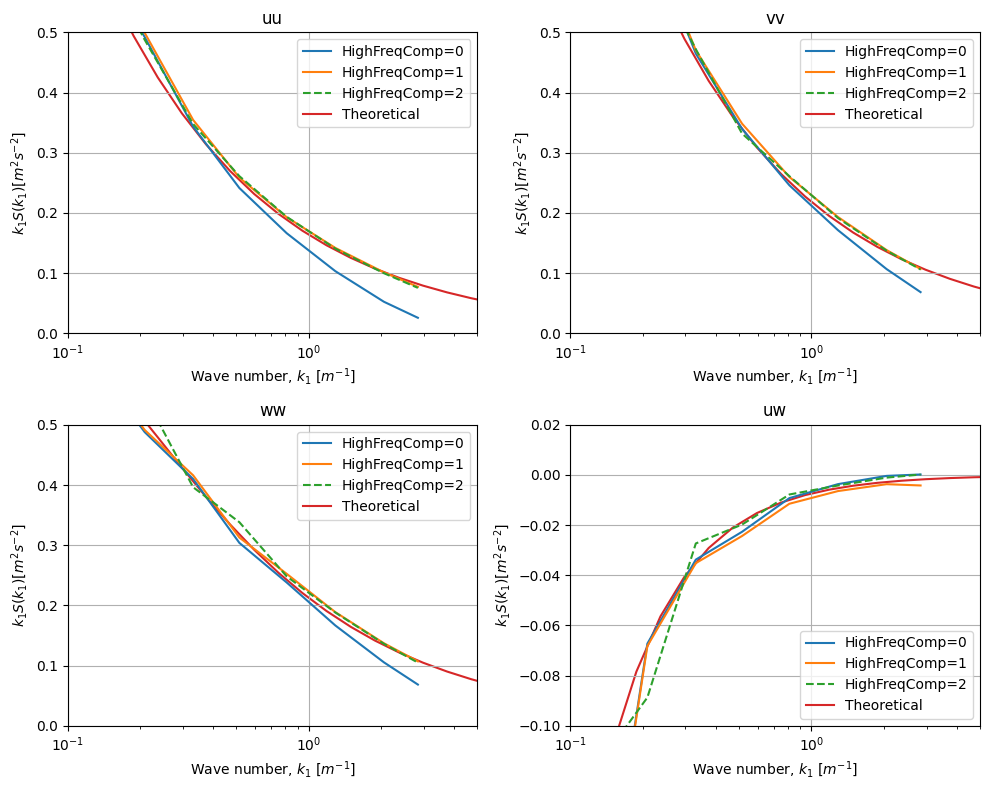

In [38]:
axes = plt.subplots(2,2, figsize=(10,8))[1].flatten()
    
for hfc in [0,1,2]:
    t = time.time()
    mtf = MannTurbulenceField.generate(Nxyz=(256,64,64), HighFreqComp=hfc, double_xyz=(0,0,0), verbose=0)
    k,S = mtf.spectra()
    print (f"Spectra with HighFreqComp={hfc} computed in {time.time()-t:.0f}s")
    for ax, Phi, in zip(axes, S):
        ls = ['-', '--'][hfc==2]
        ax.semilogx(k, Phi*k, ls, label=f'HighFreqComp={hfc}')     

k,S = mtf.spectra_lookup()
for ax, Phi, s in zip(axes, S, s_lst):
    ax.set_title(s)
    ax.semilogx(k, Phi*k, label=f'Theoretical', zorder=-32)     
    ax.set_xlabel('Wave number, $k_1$ $  [m^{-1}$]')
    ax.set_ylabel('$k_1 S(k_1)[m^2s^{-2}]$')
    ax.grid()
    ax.legend()
    ax.set_xlim([0.1,5])
    ax.set_ylim([0,.5])
axes[3].set_ylim([-0.1,.02])
plt.tight_layout()

## Contraints 
It is possible to modify a turbulence field


In [39]:
mtf = MannTurbulenceField.generate(Nxyz=(128, 16, 8), dxyz=(2, 3, 4))

to satisfy a number of constraints

In [40]:
constraints = np.array([[0, 0, 4, 5, 1, 2], # constr 1, x,y,z, u,v,w
                        [50, 0, 4, 6, 2, 1],
                        [100, 0, 4, 5, 1, 2]])

via the `constrain` method

Computing Mann tensor / correlation arrays for constrained simulation:
Correlation computations complete
Time elapsed is 0.02411961555480957
Populating covariance matrix for the constraints:
Constraint-constraint covariance matrix has been assembled
Time elapsed is 0.0010647773742675781
Applying constraints...
Constrained simulation complete
Total time elapsed is 0.027193307876586914


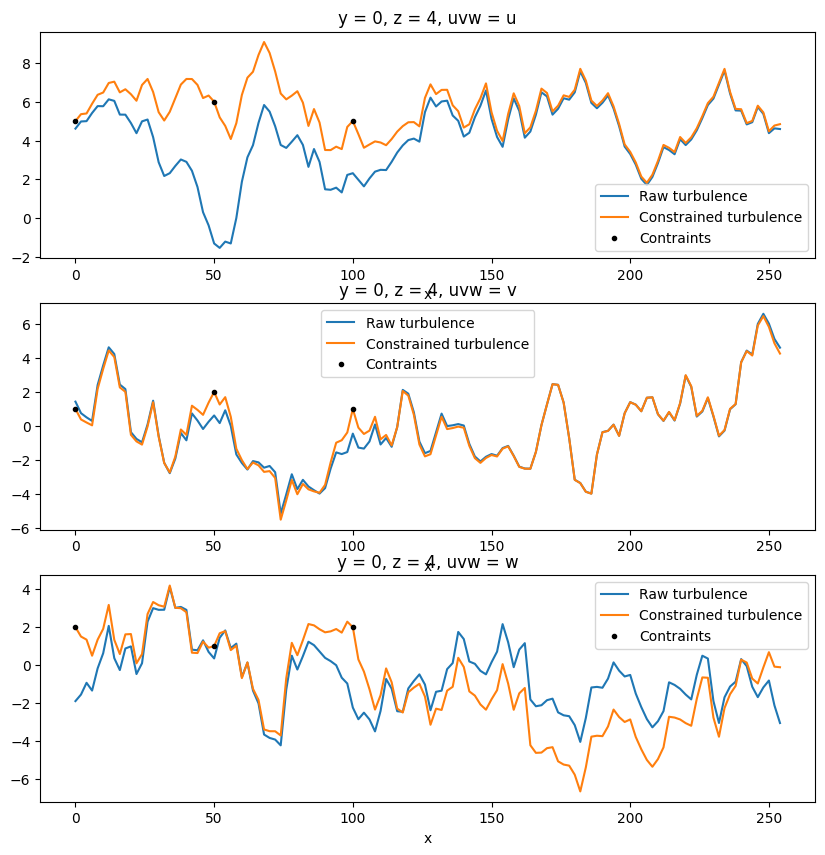

In [41]:
axes = plt.subplots(3, 1, figsize=(10,10))[1]
for ax, c in zip(axes, 'uvw'):
    mtf.to_xarray().sel(uvw=c, y=0, z=4).plot(ax=ax, label='Raw turbulence')

mtf.constrain(constraints)


for i, (ax, c) in enumerate(zip(axes, 'uvw'), 3):
    mtf.to_xarray().sel(uvw=c, y=0, z=4).plot(ax=ax, label='Constrained turbulence')

    ax.plot([], '.k', label='Contraints')
    for con in constraints:
        ax.plot(con[0], con[i], '.k')
    ax.legend()